In [30]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/225.8 GB disk)


In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
dataset_path = '/content/drive/MyDrive/HW4pt2'

### Show the first five images and labels from the training set

In [33]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, labels_dir, transform=None):
        self.img_dir = img_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.img_names = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

        # Debug print to check how many images were found
        print(f"Found {len(self.img_names)} images in {img_dir}")

        if len(self.img_names) == 0:
            raise RuntimeError(f"No images found in {img_dir}. Check the directory and file permissions.")

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_path).convert('RGB')

        label_path = os.path.join(self.labels_dir, self.img_names[idx].replace('.jpg', '.txt'))
        if not os.path.exists(label_path):
            print(f"Label file not found for image: {img_path}")
            return None  # Or handle missing label files as needed

        with open(label_path, 'r') as f:
            label = f.read().strip()

        if self.transform:
            image = self.transform(image)

        return image, label

Found 534 images in /content/drive/MyDrive/HW4pt2/dataset/train/images


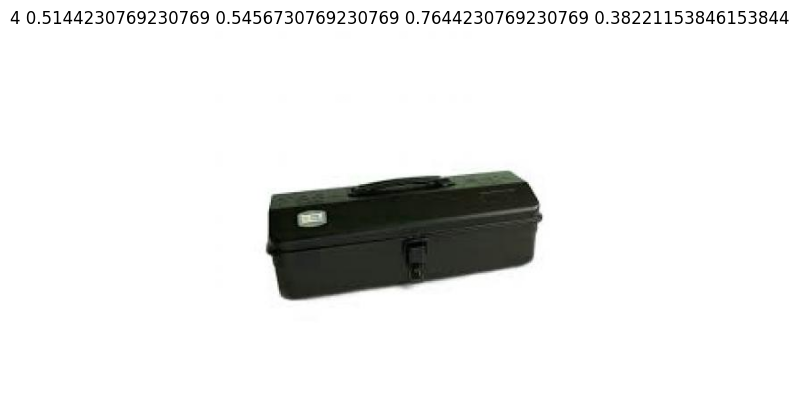

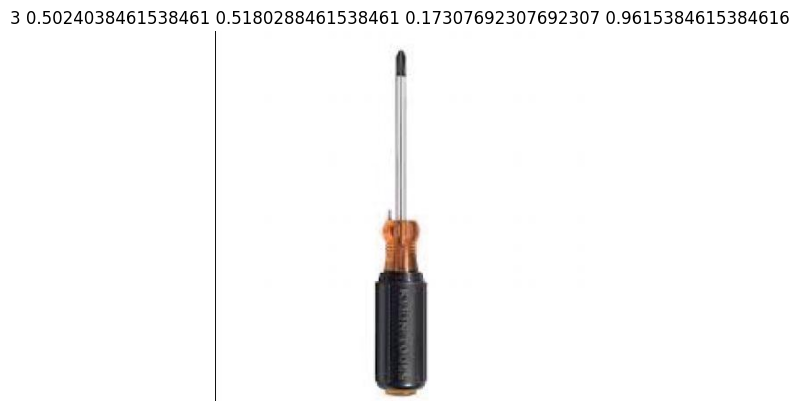

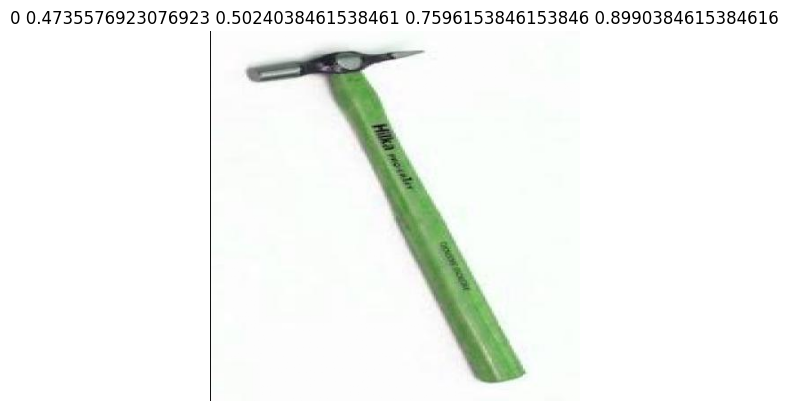

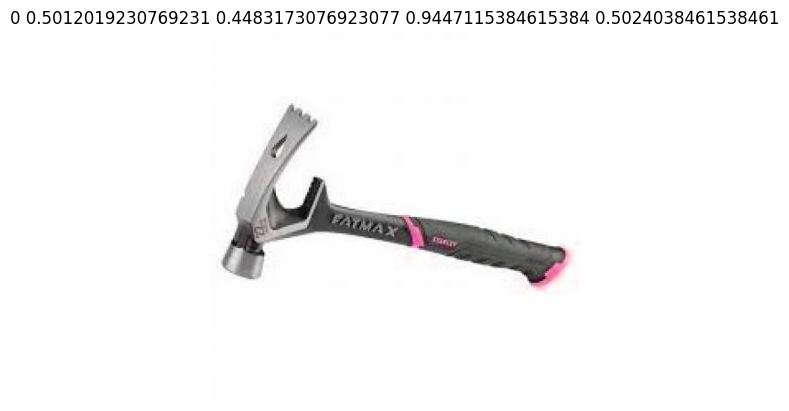

In [34]:
import os
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

# Define your image transformations, including converting to a tensor
data_transforms = transforms.Compose([
    transforms.ToTensor()  # Converts PIL image to a PyTorch tensor
])

# Define the CustomImageDataset class
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, labels_dir, transform=None):
        self.img_dir = img_dir
        self.labels_dir = labels_dir
        self.transform = transform
        self.img_names = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(img_dir, f))]

        # Debug print to check how many images were found
        print(f"Found {len(self.img_names)} images in {img_dir}")

        if len(self.img_names) == 0:
            raise RuntimeError(f"No images found in {img_dir}. Check the directory and file permissions.")

    def __len__(self):
        return len(self.img_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_names[idx])
        image = Image.open(img_path).convert('RGB')

        label_path = os.path.join(self.labels_dir, self.img_names[idx].replace('.jpg', '.txt'))
        if not os.path.exists(label_path):
            print(f"Label file not found for image: {img_path}")
            return None  # Or handle missing label files as needed

        with open(label_path, 'r') as f:
            label = f.read().strip()

        # Apply transformations
        if self.transform:
            image = self.transform(image)

        return image, label

# Adjust these paths to your specific train set location
train_img_dir = '/content/drive/MyDrive/HW4pt2/dataset/train/images'  # Replace with the path to your train images folder
train_labels_dir = '/content/drive/MyDrive/HW4pt2/dataset/train/labels'  # Replace with the path to your train labels folder

# Create the train dataset
train_dataset = CustomImageDataset(
    img_dir=train_img_dir,
    labels_dir=train_labels_dir,
    transform=data_transforms
)

# Create a DataLoader for the train dataset
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Function to display an image with its label
def imshow(img, label):
    img = img.permute(1, 2, 0)  # Reorder dimensions to match what plt expects (H, W, C)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()

# Fetch a batch of data
images, labels = next(iter(train_loader))

# Visualize the first five images in the batch
for i in range(min(len(images), 5)):  # Show up to 5 images
    imshow(images[i], labels[i])


In [35]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.6/225.8 GB disk)


In [36]:
from ultralytics import YOLO

from IPython.display import display, Image

## Training

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Upgrade to latest version
!pip install -U albumentations

In [40]:
# Alternatively, downgrade if the issue persists
!pip install albumentations==1.0.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.16
    Uninstalling albumentations-1.4.16:
      Successfully uninstalled albumentations-1.4.16


In [41]:
%cd /content/drive/MyDrive/HW4pt2/dataset
!yolo task=detect mode=train model=yolov8s.pt data='/content/drive/MyDrive/HW4pt2/dataset/data.yaml' epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/HW4-2/dataset
/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(fil

In [43]:
!ls /content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5

args.yaml					      PR_curve.png	  train_batch511.jpg
confusion_matrix_normalized.png			      R_curve.png	  train_batch512.jpg
confusion_matrix.png				      results.csv	  val_batch0_labels.jpg
events.out.tfevents.1727577513.c667b1b16955.127078.0  results.png	  val_batch0_pred.jpg
F1_curve.png					      train_batch0.jpg	  val_batch1_labels.jpg
labels_correlogram.jpg				      train_batch1.jpg	  val_batch1_pred.jpg
labels.jpg					      train_batch2.jpg	  weights
P_curve.png					      train_batch510.jpg


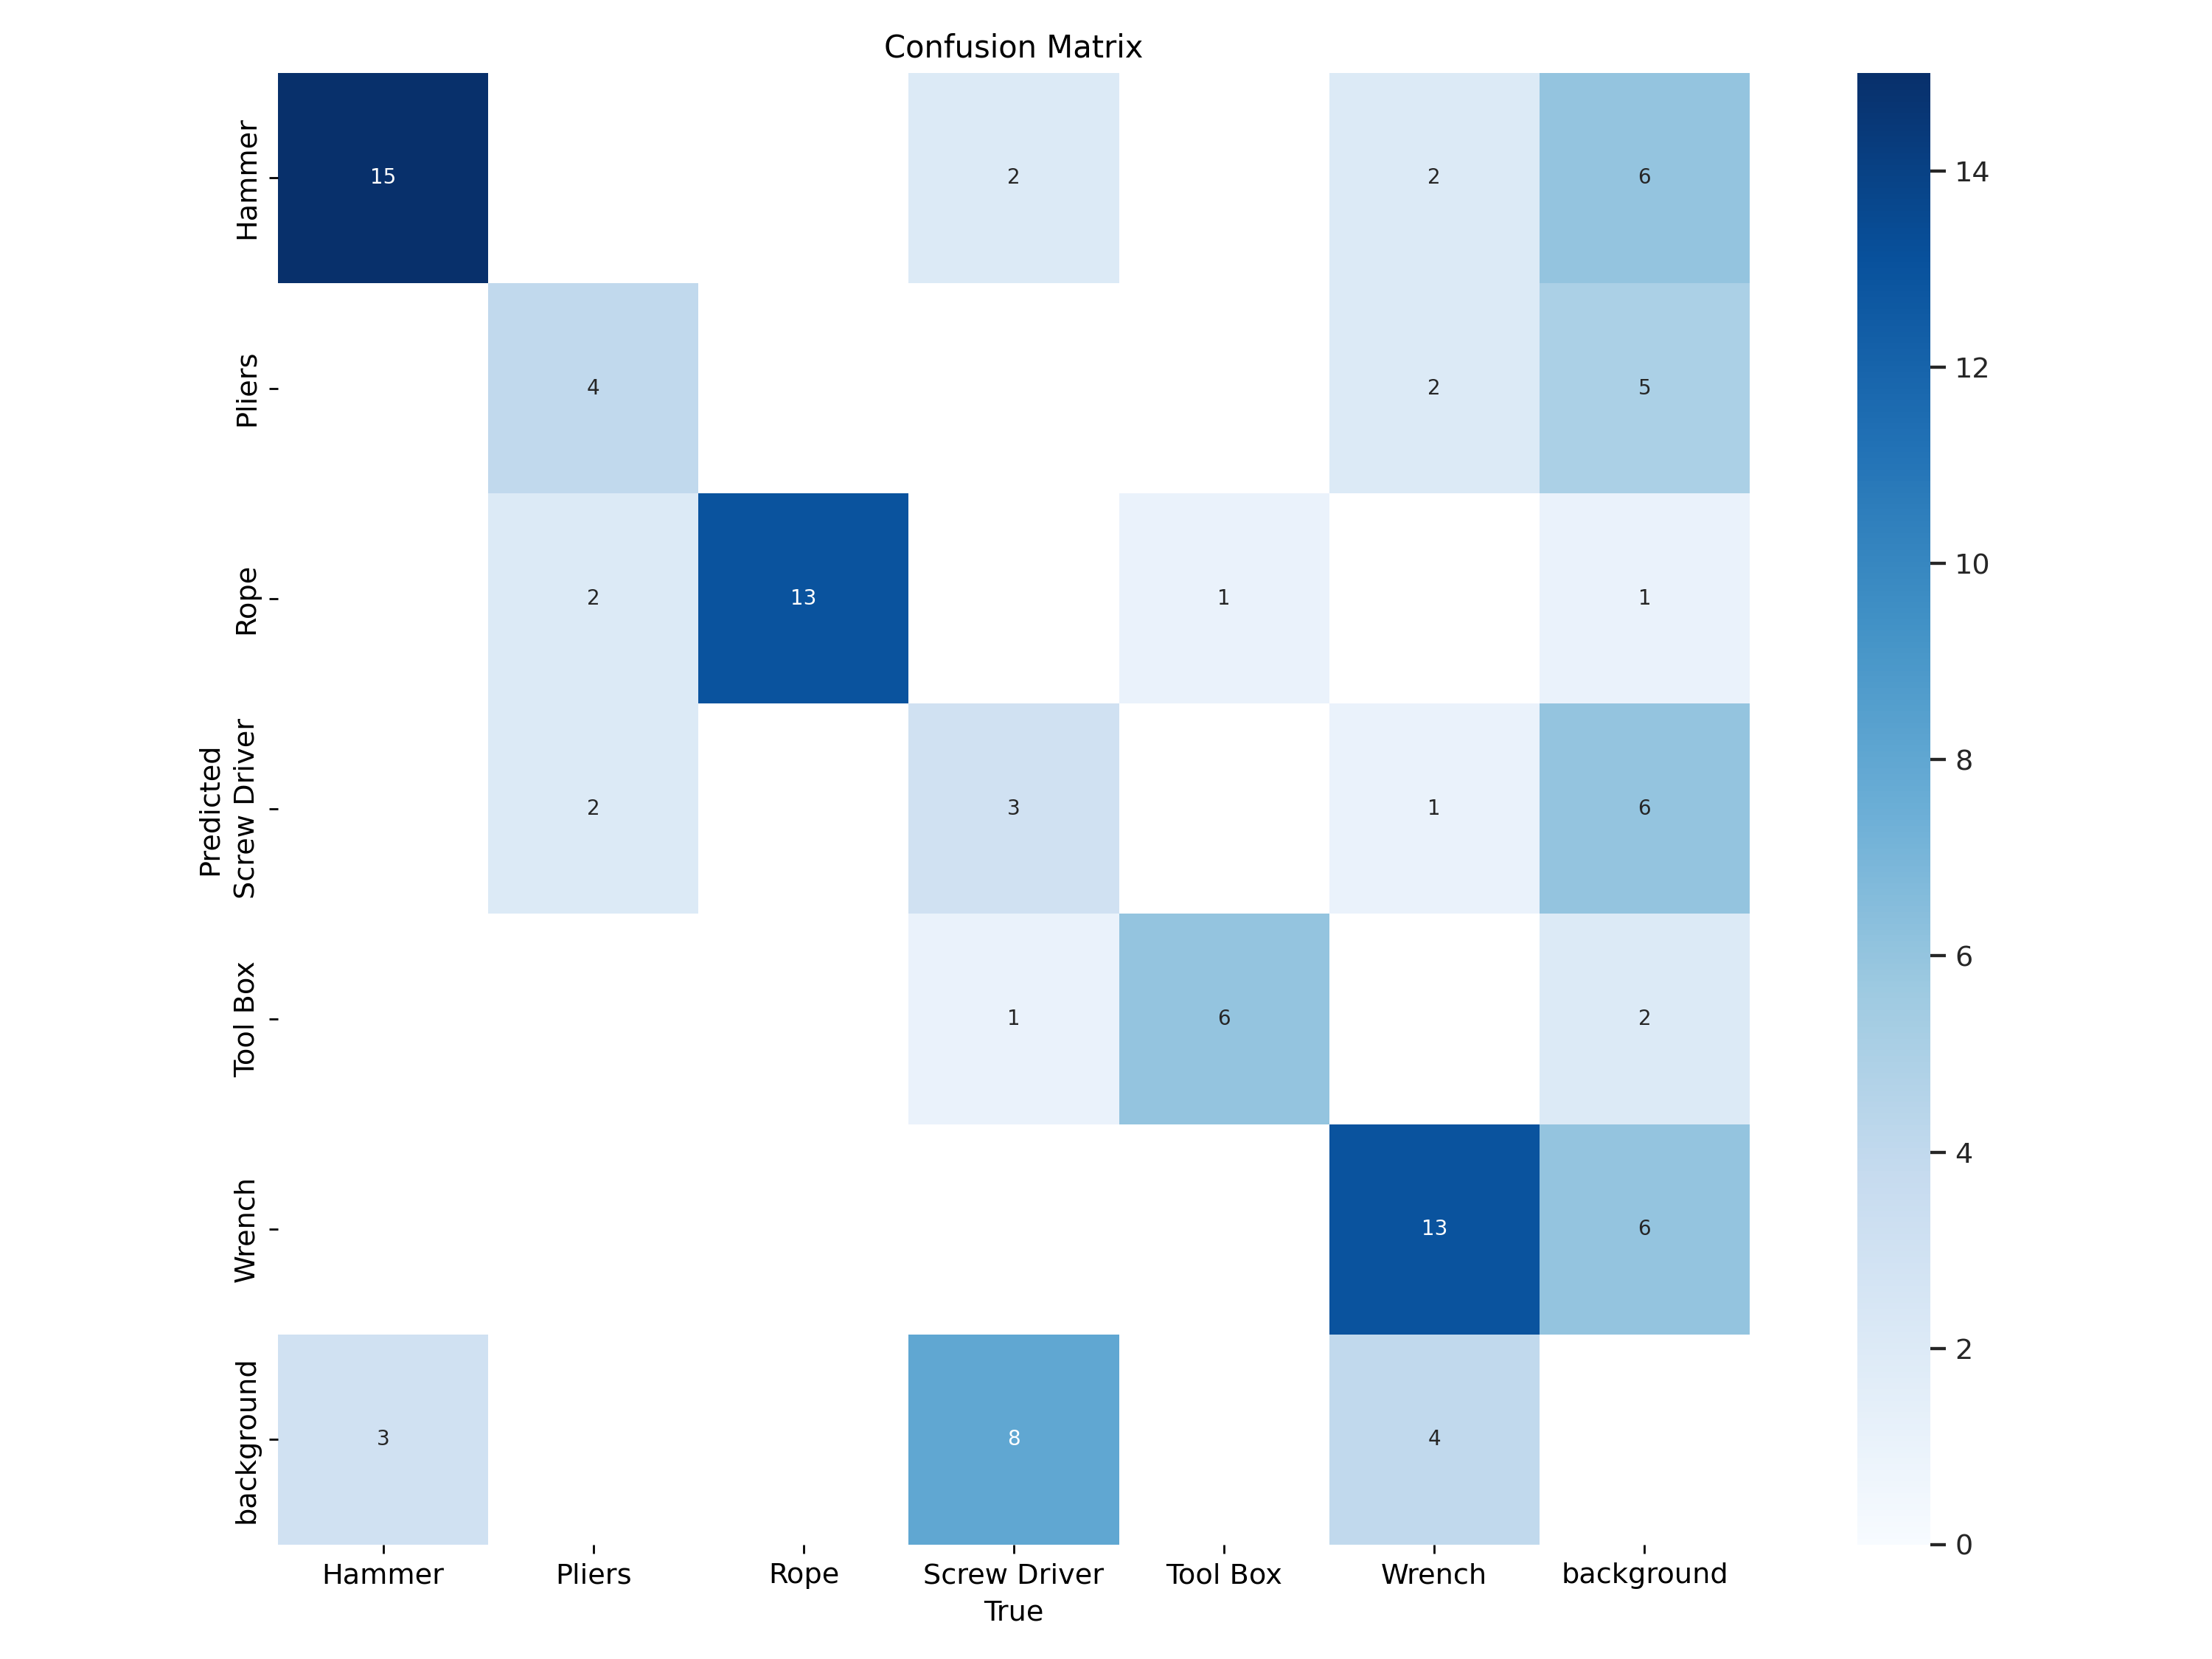

In [44]:
Image(filename='/content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5/confusion_matrix.png', width=600)

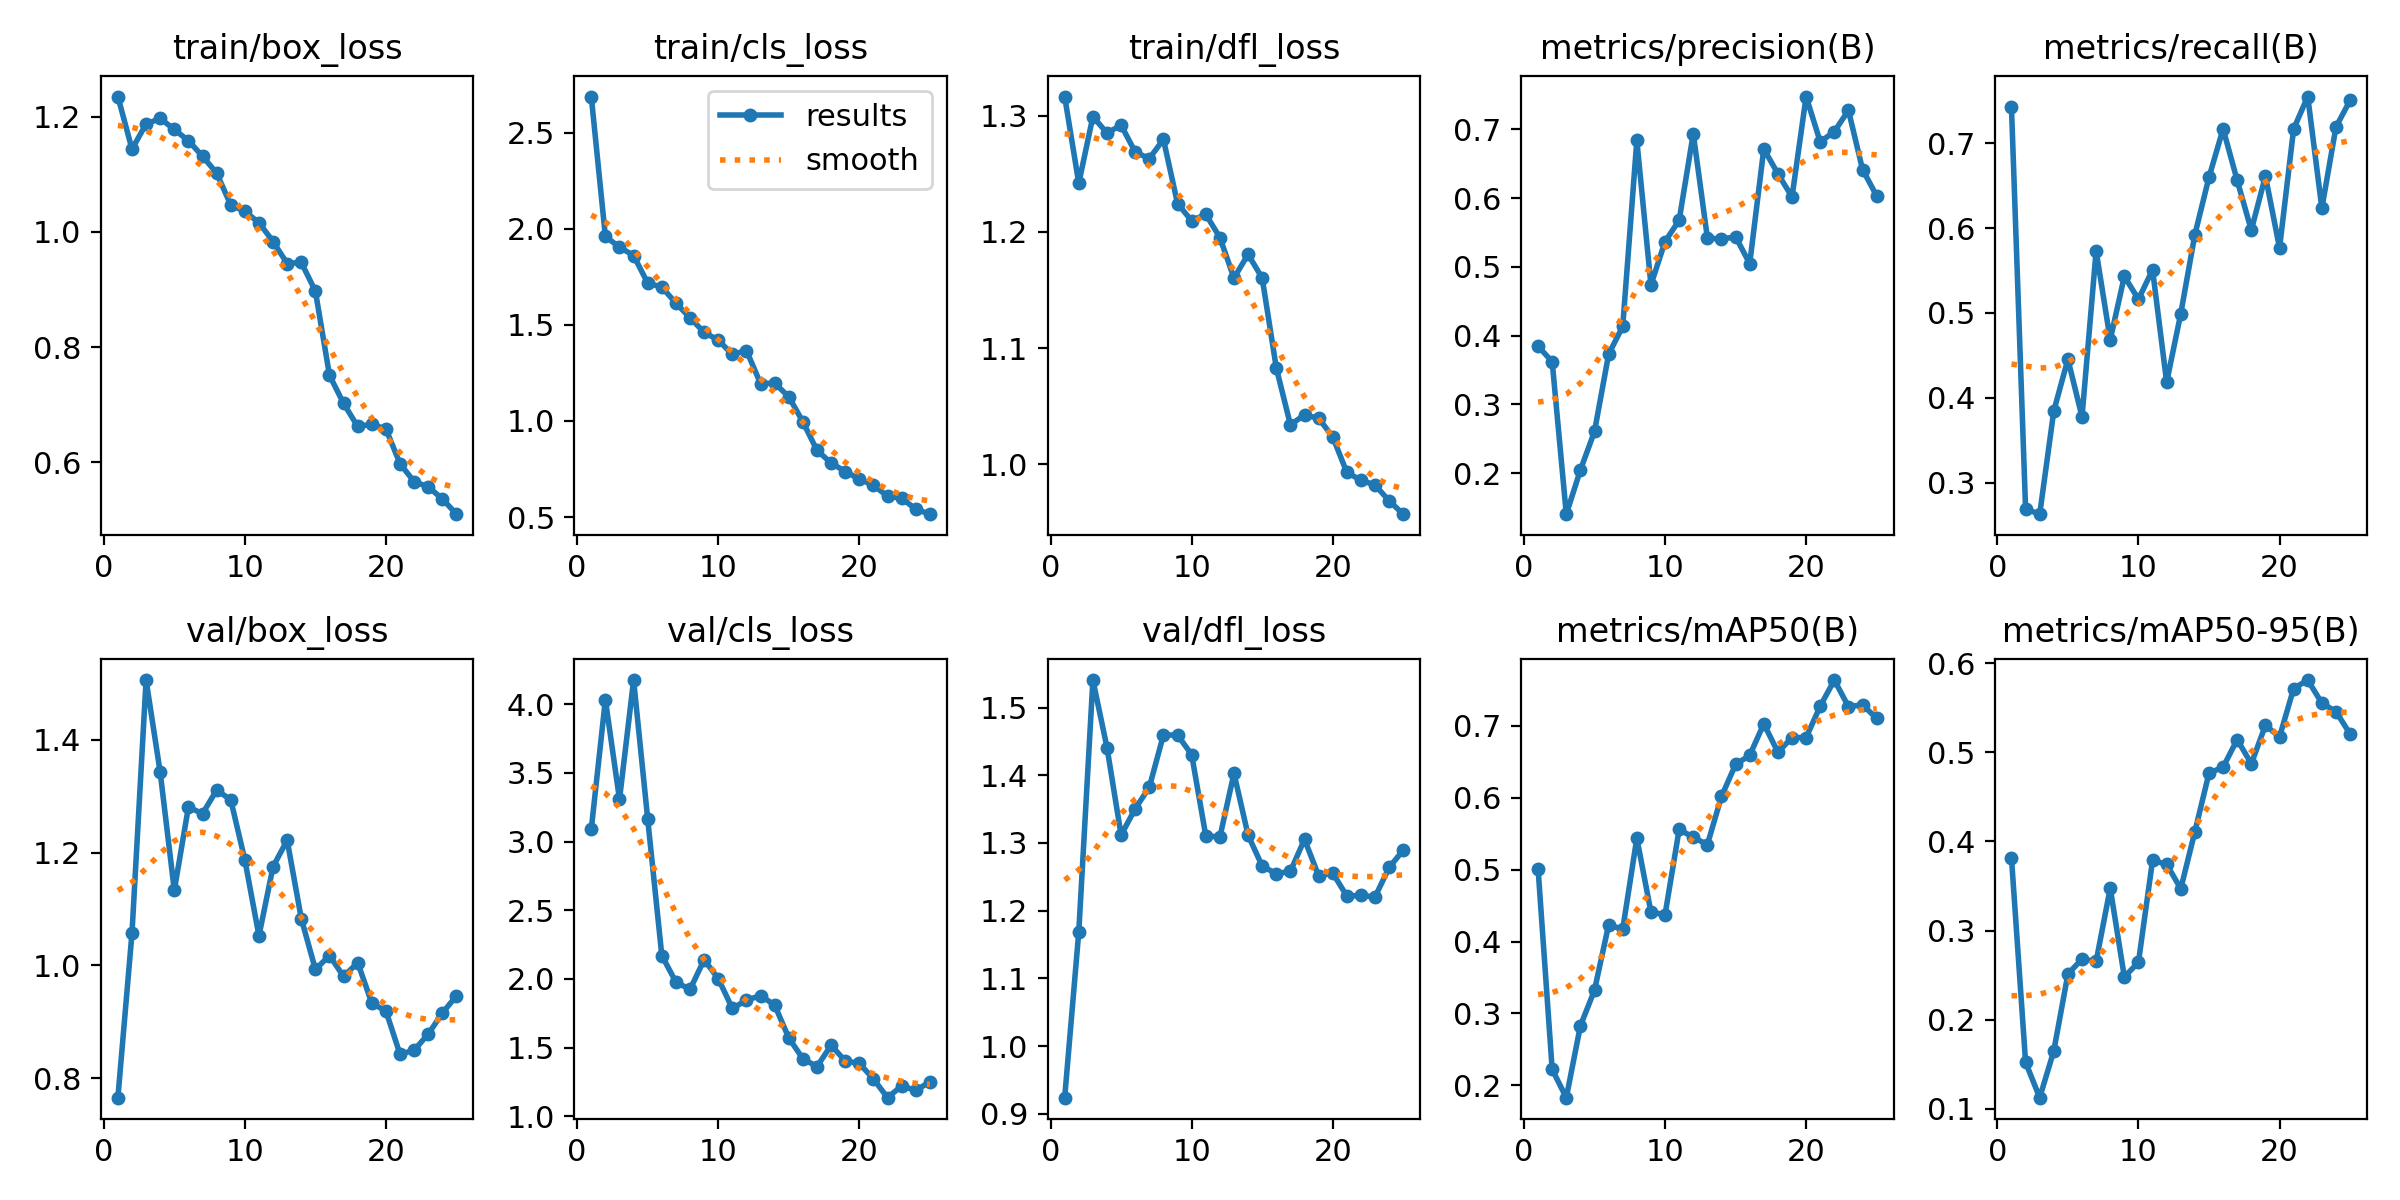

In [45]:
Image(filename='/content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5/results.png', width=600)

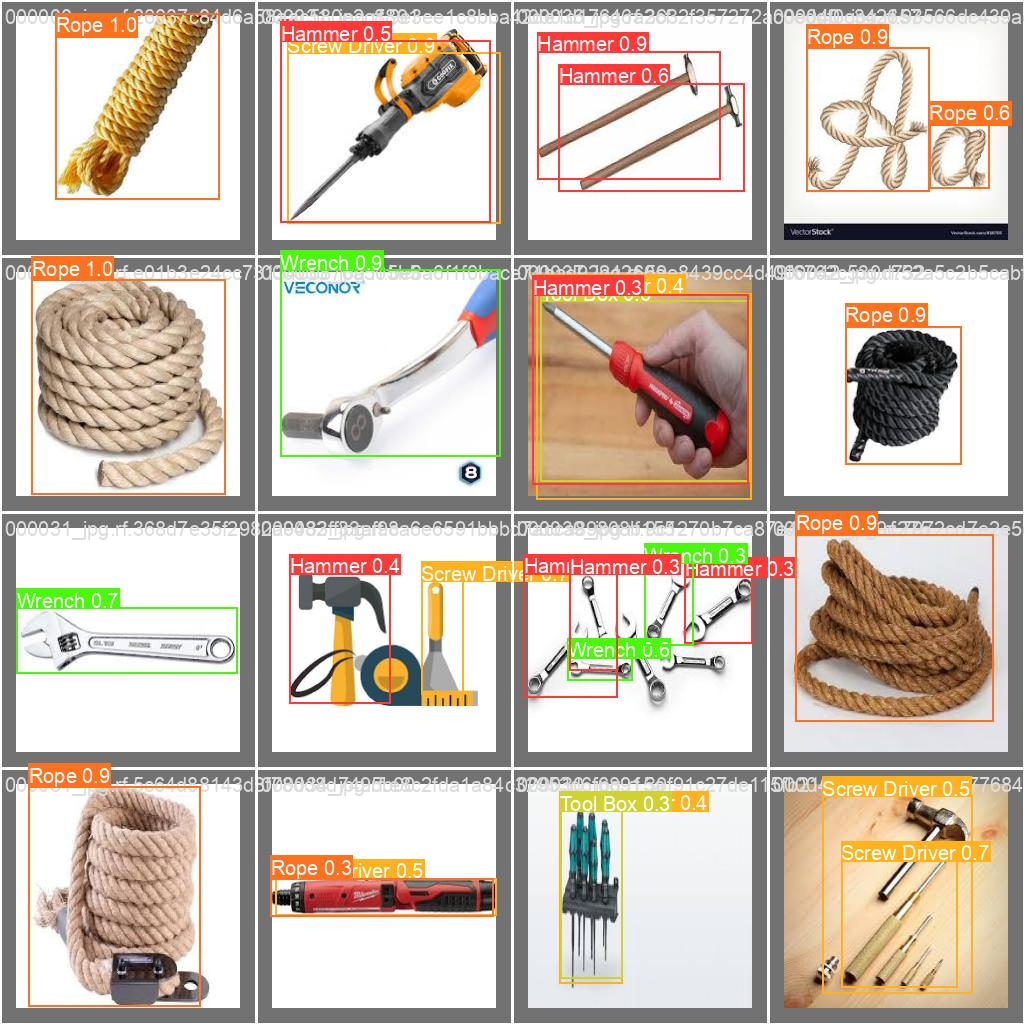

In [46]:
Image(filename='/content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [47]:
!yolo task=detect mode=val model=/content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5/weights/best.pt data=/content/drive/MyDrive/HW4pt2/dataset/data.yaml

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [48]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/HW4pt2/dataset/runs/detect/train5/weights/best.pt conf=0.25 source=/content/drive/MyDrive/HW4pt2/dataset/runs/detect/val

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


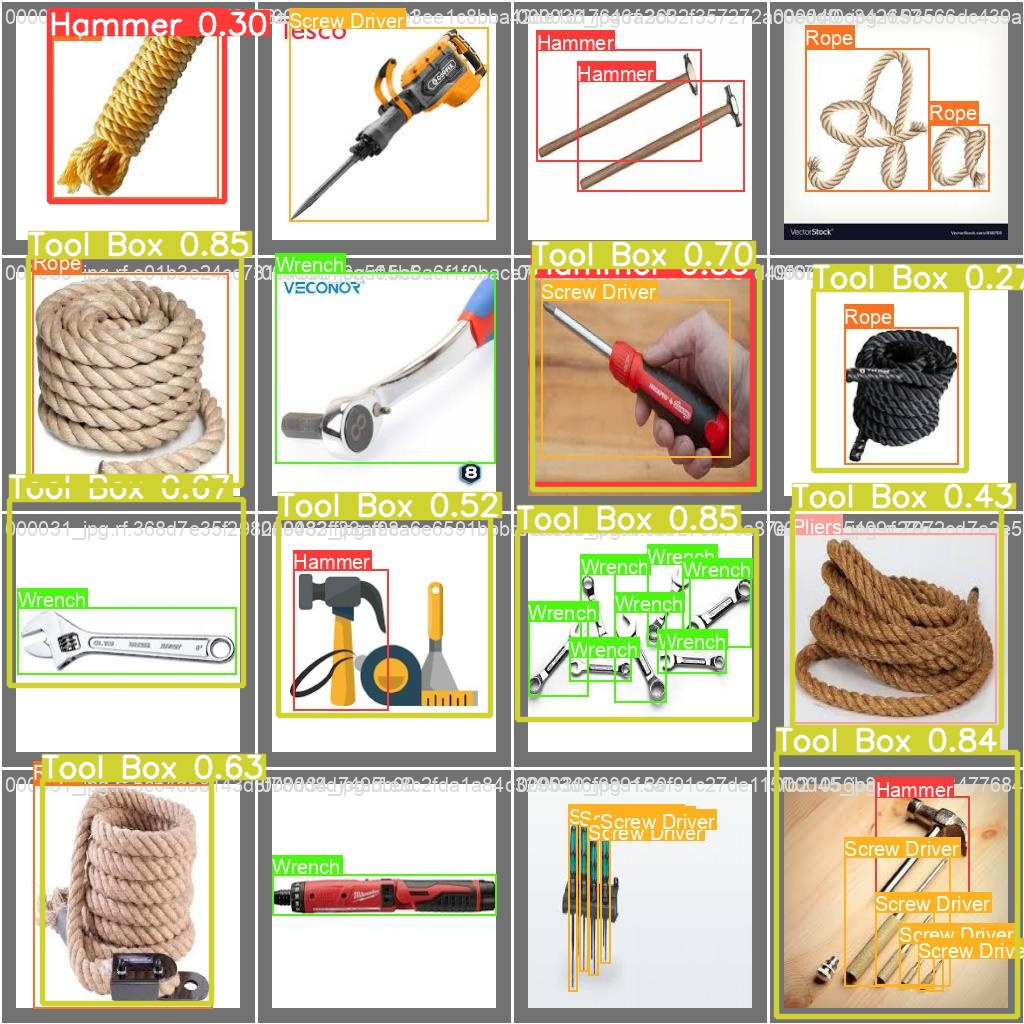

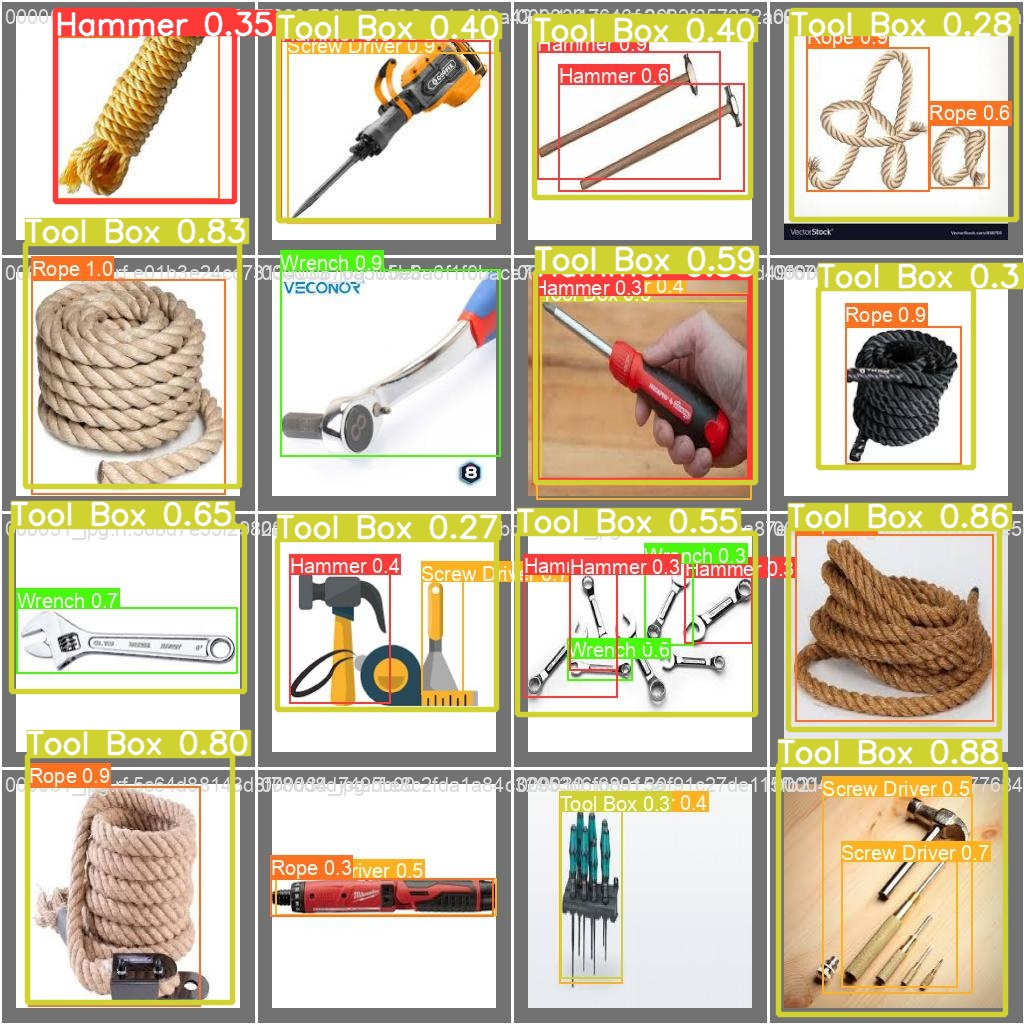

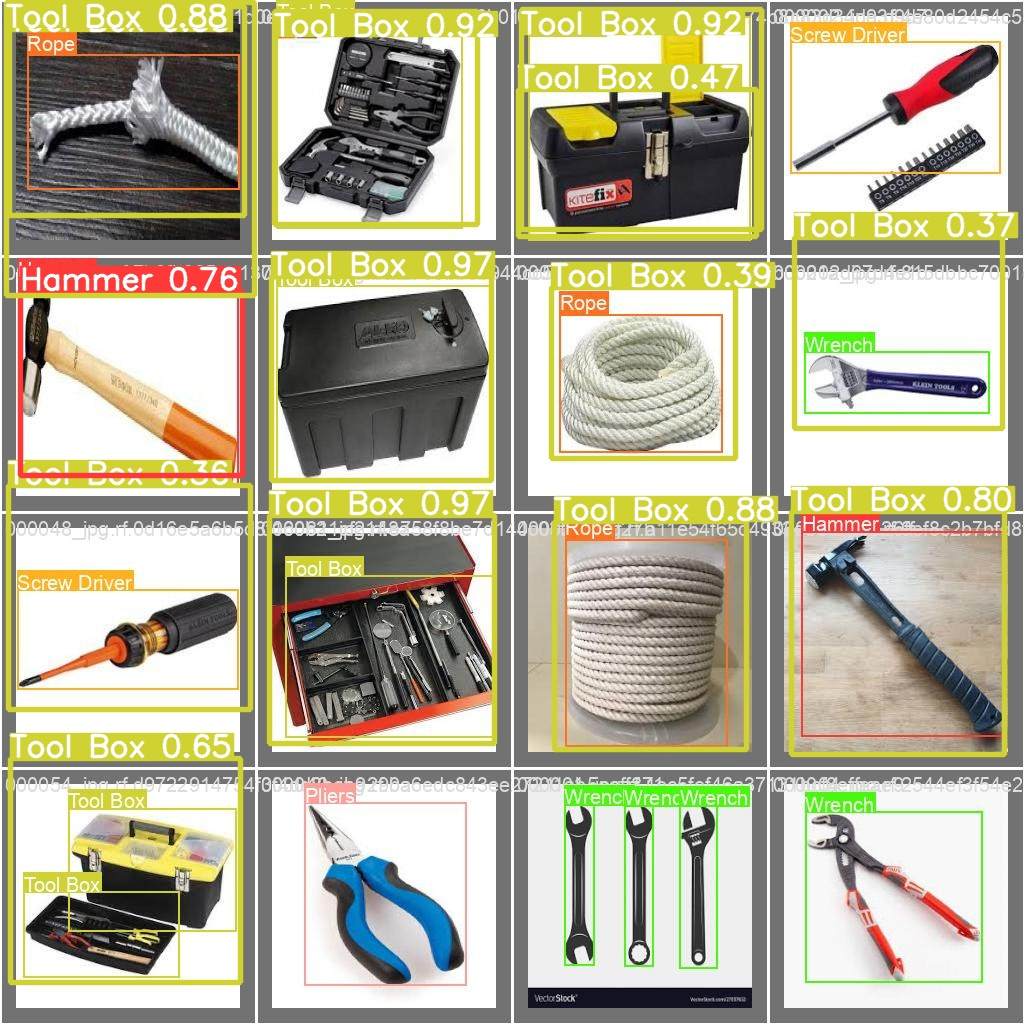

In [49]:
import glob
from IPython.display import Image, display

# Providing the path
image_paths = glob.glob('/content/drive/MyDrive/HW4pt2/dataset/runs/detect/predict/*.jpg')

# Displaying the first three images
for image_path in image_paths[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")